## Bike Sharing Demand - Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and Preview Data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print('Length Train Data: ', len(train_df))
print('Length Test Data: ', len(test_df))

Length Train Data:  10886
Length Test Data:  6493


In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Transform Data

In [5]:
def season_map(x):
    seasons = ['spring','summer','fall','winter']
    return seasons[x-1]

def weather_map(x):
    weather = ['clear','mist','light_rain','heavy_rain']
    return weather[x-1]

train_df['season'] = train_df['season'].map(season_map)
train_df['weather'] = train_df['weather'].map(weather_map)
train_df['hour'] = train_df['datetime'].apply(lambda x: pd.to_datetime(x).hour)
train_df[['round_temp','round_atemp']] = train_df[['temp','atemp']].apply(lambda x: round(x))
train_df[['round_humidity','round_windspeed']] = train_df[['humidity','windspeed']].apply(lambda x: round(x,-1))
train_df = train_df.rename(columns={'count':'both'})
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,both,hour,round_temp,round_atemp,round_humidity,round_windspeed
0,2011-01-01 00:00:00,spring,0,0,clear,9.84,14.395,81,0.0000,3,13,16,0,10.0,14.0,80,0.0
1,2011-01-01 01:00:00,spring,0,0,clear,9.02,13.635,80,0.0000,8,32,40,1,9.0,14.0,80,0.0
2,2011-01-01 02:00:00,spring,0,0,clear,9.02,13.635,80,0.0000,5,27,32,2,9.0,14.0,80,0.0
3,2011-01-01 03:00:00,spring,0,0,clear,9.84,14.395,75,0.0000,3,10,13,3,10.0,14.0,80,0.0
4,2011-01-01 04:00:00,spring,0,0,clear,9.84,14.395,75,0.0000,0,1,1,4,10.0,14.0,80,0.0
5,2011-01-01 05:00:00,spring,0,0,mist,9.84,12.880,75,6.0032,0,1,1,5,10.0,13.0,80,10.0
6,2011-01-01 06:00:00,spring,0,0,clear,9.02,13.635,80,0.0000,2,0,2,6,9.0,14.0,80,0.0
7,2011-01-01 07:00:00,spring,0,0,clear,8.20,12.880,86,0.0000,1,2,3,7,8.0,13.0,90,0.0
8,2011-01-01 08:00:00,spring,0,0,clear,9.84,14.395,75,0.0000,1,7,8,8,10.0,14.0,80,0.0
9,2011-01-01 09:00:00,spring,0,0,clear,13.12,17.425,76,0.0000,8,6,14,9,13.0,17.0,80,0.0


### Data Exploration

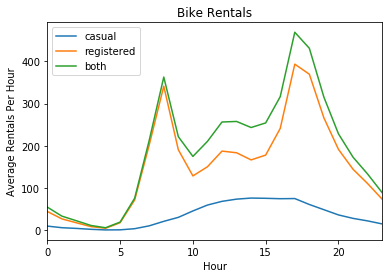

In [6]:
# First see distribution of rentals only by hour.
counts = ['casual','registered','both'] # All 3 variables we would like to predict.
hour_train_df = train_df[['hour'] + counts].groupby('hour').mean()
hour_train_df.plot()
plt.xlabel('Hour')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

We see the most popular times are in morning hours and after work. Those registered follow a more strict distribution.

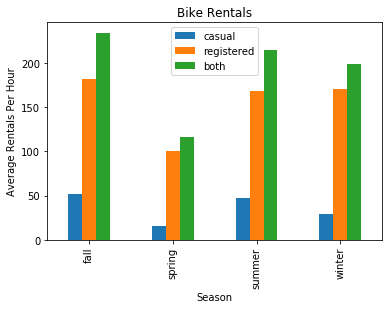

In [7]:
# See distribution of rentals by season.
seasons_train_df = train_df[['season'] + counts].groupby('season').mean()
seasons_train_df.plot.bar()
plt.xlabel('Season')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

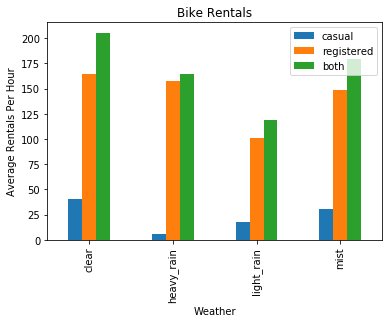

In [8]:
# Distribution by weather.
weather_train_df = train_df[['weather'] + counts].groupby('weather').mean()
weather_train_df.plot.bar()
plt.xlabel('Weather')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

In [9]:
# Mean of heavy_rain days was abnormally high, investigate why.
heavy_rain_df = train_df[train_df['weather'] == 'heavy_rain']
heavy_rain_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,both,hour,round_temp,round_atemp,round_humidity,round_windspeed
5631,2012-01-09 18:00:00,spring,0,1,heavy_rain,8.2,11.365,86,6.0032,6,158,164,18,8.0,11.0,90,10.0


We see only one hour of heavy rain exists, and it has a high count!

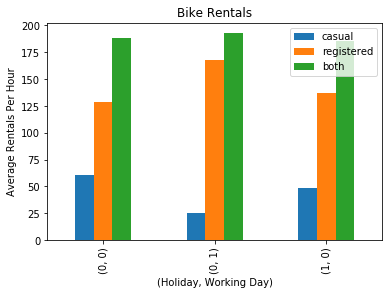

In [10]:
# By holiday / workday.
days = ['holiday','workingday']
work_train_df = train_df[days + counts].groupby(days).mean().reset_index()
work_train_df.plot.bar(x=days)
plt.xlabel('(Holiday, Working Day)')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

Doesn't seem to make a difference if working day or holiday.

In [11]:
# By season, weather, and hour, sorted. Discover which yield the highest rates.
cols = ['season','weather','hour']
combined_train_df = train_df[cols + counts].groupby(cols).mean().reset_index().sort_values('both', ascending=False)
combined_train_df

,season,weather,hour,casual,registered,both
17,fall,clear,17,112.500000,491.182927,603.682927
162,summer,clear,17,103.812500,482.337500,586.150000
18,fall,clear,18,100.987654,465.839506,566.827160
65,fall,mist,17,102.666667,451.222222,553.888889
163,summer,clear,18,91.307692,452.769231,544.076923
66,fall,mist,18,87.818182,440.681818,528.500000
234,winter,clear,17,67.407895,447.736842,515.144737
210,summer,mist,17,120.869565,365.521739,486.391304
282,winter,mist,17,42.416667,429.791667,472.208333
283,winter,mist,18,31.461538,440.615385,472.076923


We see the peak situations for bike rentals: Clear summer and fall days after work.

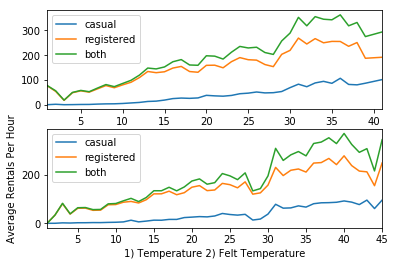

In [12]:
# Temperature
temp_train_df = train_df[['round_temp'] + counts].groupby('round_temp').mean()
atemp_train_df = train_df[['round_atemp'] + counts].groupby('round_atemp').mean()
fig, axs = plt.subplots(2,1)
temp_train_df.plot(ax=axs[0])
atemp_train_df.plot(ax=axs[1])
plt.xlabel('1) Temperature 2) Felt Temperature')
plt.ylabel('Average Rentals Per Hour')
plt.show()

Generally, the higher temperature the better.

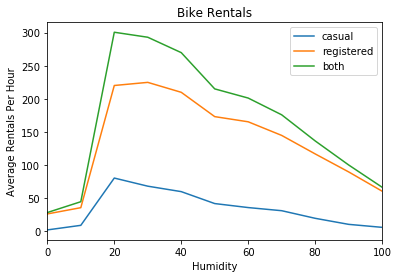

In [13]:
# Humidity
humidity_train_df = train_df[['round_humidity'] + counts].groupby('round_humidity').mean()
humidity_train_df.plot()
plt.xlabel('Humidity')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

Too dry is very bad for rentals? Should investigate. As expected, too wet is bad as well, but drops off steadily.

In [14]:
low_humidity_df = train_df[train_df['humidity'] < 15]
low_humidity_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,both,hour,round_temp,round_atemp,round_humidity,round_windspeed
851,2011-02-18 22:00:00,spring,0,1,clear,22.14,25.760,10,16.9979,19,88,107,22,22.0,26.0,10,20.0
852,2011-02-18 23:00:00,spring,0,1,clear,21.32,25.000,8,19.0012,16,61,77,23,21.0,25.0,10,20.0
853,2011-02-19 00:00:00,spring,0,0,clear,19.68,23.485,12,32.9975,6,23,29,0,20.0,23.0,10,30.0
854,2011-02-19 01:00:00,spring,0,0,clear,18.86,22.725,14,27.9993,10,21,31,1,19.0,23.0,10,30.0
855,2011-02-19 02:00:00,spring,0,0,clear,18.04,21.970,13,26.0027,3,14,17,2,18.0,22.0,10,30.0
856,2011-02-19 03:00:00,spring,0,0,clear,17.22,21.210,14,19.9995,0,7,7,3,17.0,21.0,10,20.0
1091,2011-03-10 00:00:00,spring,0,1,light_rain,13.94,15.910,0,16.9979,3,0,3,0,14.0,16.0,0,20.0
1092,2011-03-10 01:00:00,spring,0,1,light_rain,13.94,15.910,0,16.9979,0,2,2,1,14.0,16.0,0,20.0
1093,2011-03-10 02:00:00,spring,0,1,light_rain,13.94,15.910,0,16.9979,0,1,1,2,14.0,16.0,0,20.0
1094,2011-03-10 05:00:00,spring,0,1,light_rain,14.76,17.425,0,12.9980,1,2,3,5,15.0,17.0,0,10.0


Many of these days of light rain have zero humidity? Let's see the distribution of weather and humidity.

In [15]:
cols = ['round_humidity','weather']
humidity_weather_train_df = train_df[cols + ['both']].groupby(cols).count().rename(columns={'both':'Number of Hours'})
humidity_weather_train_df

Number of Hours
round_humidity weather                    
0              light_rain               20
               mist                      2
10             clear                     6
20             clear                   180
               mist                     10
30             clear                   565
               mist                     50
40             clear                  1376
               light_rain               11
               mist                    222
50             clear                  1295
               light_rain               23
               mist                    357
60             clear                  1395
               light_rain               57
               mist                    525
70             clear                  1021
               light_rain               82
               mist                    485
80             clear                   935
               light_rain              204
               mist                    532
90             clear                   410
               heavy_rain                1
               light_rain              381
               mist                    591
100            clear                     9
               light_rain               81
               mist                     60

Very strange that there are 20 light rain occurrences at close to zero humidity...

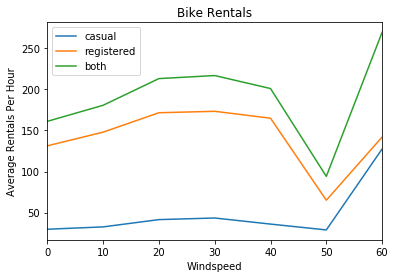

In [16]:
# Windspeed
windspeed_train_df = train_df[['round_windspeed'] + counts].groupby('round_windspeed').mean()
windspeed_train_df.plot()
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals Per Hour')
plt.title('Bike Rentals')
plt.show()

In [17]:
# Strange pattern. Investigate!
high_wind_df = train_df[train_df['windspeed'] > 45]
high_wind_df = high_wind_df[['windspeed','hour','both']].sort_values('windspeed')
high_wind_df

,windspeed,hour,both
761,46.0022,2,3
6141,46.0022,3,14
6513,46.0022,15,185
6142,47.9988,4,1
6988,47.9988,12,280
868,50.0021,15,171
760,51.9987,1,5
2755,56.9969,17,358
2756,56.9969,18,181


Inconsistency is just due to small sample size. Should account for differences in time in the average.

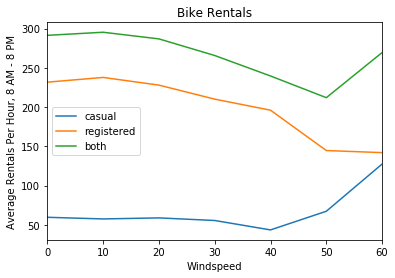

In [18]:
# Windspeed during daytime.
daytime_df = train_df[(train_df['hour'] > 7) & (train_df['hour'] < 21)]
windspeed2_train_df = daytime_df[['round_windspeed'] + counts].groupby('round_windspeed').mean()
windspeed2_train_df.plot()
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals Per Hour, 8 AM - 8 PM')
plt.title('Bike Rentals')
plt.show()

Inconsistency is somewhat smoothed out.